# CKA analysis of the Models
In this notebook we observe the results of the CKA similarity among models.

In [10]:
%reload_ext autoreload
%autoreload 2

In [11]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)
from plotting_utility import *

Load the results in a CSV file:

In [12]:
tags = ["baseline", "JREG_0.1", "LIP_0.00001"]
load_econ_metrics(tags)

Load the results from the CSV: and filter it:

In [13]:
regularizer = ["Baseline", "Jacobian (δ=1e-1)", "Orthogonality (δ=1e-5)"]
df = pd.read_csv("./results/econ/metrics.csv")
selected_df = df[(df['regularizer'].isin(regularizer))]

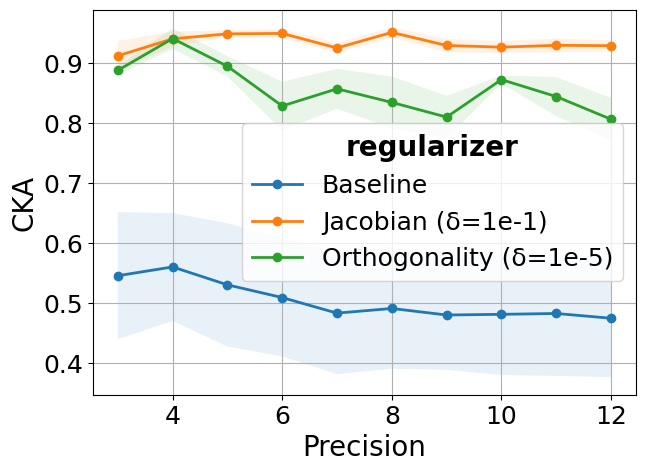

In [14]:
plot_precision_vs_metrics(selected_df, "regularizer", "precision", "CKA", "CKA_std", plot_legend=True)

## Ablation studies

Load the ablation studies from the checkpoints:

In [15]:
# store the results
cka = []
for p in precisions:
    for x, bs in enumerate(batch_sizes):
        for y, lr in enumerate(learning_rates):
            # build the path
            path = os.path.join(DATA_PATH, f"bs{bs}_lr{lr}/ECON_{p}b") 
            
            for m, noise in [(10, 0), (10, 10), (10, 1), (10, 20)]:
                cka.append({
                    "batch_size": bs,
                    "learning_rate": lr,
                    "precision": p,
                    "m": m,
                    "Noise module (%)": noise,
                    "CKA": get_metrics_results(path, f"CKA_similarity_{m}_{noise}", f"CKA_similarity", "mean"),
                })
                
                
df_cka = pd.DataFrame(cka)

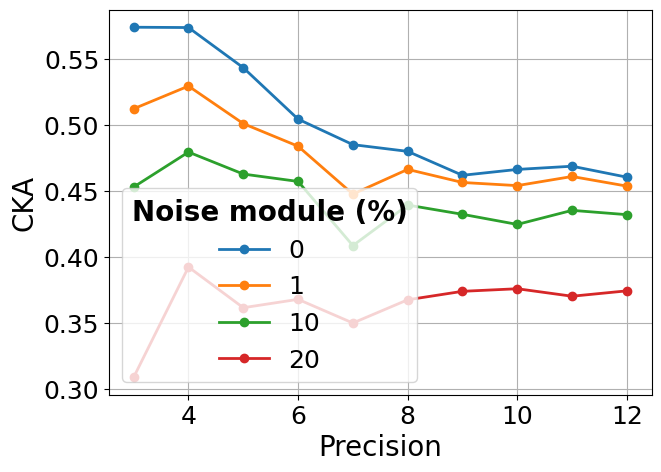

In [17]:
plot_precision_vs_metrics(df_cka, "Noise module (%)", "precision", "CKA", plot_legend=True)